In [1]:
using DelimitedFiles
using Plots
using DataFrames
using DataFramesMeta
using LaTeXStrings
using Statistics
using Jammy

[ Info: Precompiling Jammy [c197c504-bcb4-4b29-96cd-1b47f8009d3d]


In [2]:
# read SAMMY calcs in (pwd())
totlst = readdlm(joinpath("","/Users/2mx/OneDrive-ORNL/play/julia/sammy-comparison/ta181tot.lst"),Float64);
caplst = readdlm(joinpath("","/Users/2mx/OneDrive-ORNL/play/julia/sammy-comparison/ta181cap.lst"),Float64);
elalst = readdlm(joinpath("","/Users/2mx/OneDrive-ORNL/play/julia/sammy-comparison/ta181ela.lst"),Float64);

In [11]:
#### User input #############################
egrid::Vector{Float64} = totlst[:,1]#[0.01:0.0001:12.0;]
respars = DataFrame(
    Jpi = [4.0,   3.0],
    L   = [0,     0  ],
    Elam= [4.2801, 10.34],
    Gg  = [0.0530,0.0550],
    Gn  = [0.0039,0.00466],
)
respars = DataFrame(
    Jpi = [4.0,   3.0,   -5.0   ],
    L   = [0,     0,     1     ],
    Elam= [4.2801, 10.34,15.34 ],
    Gg  = [0.0530,0.0550,0.0550],
    Gn  = [0.0039,0.00466,0.00466],
)
# respars = DataFrame(
#     Jpi = [-5.0   ],
#     L   = [1     ],
#     Elam= [15.34 ],
#     Gg  = [0.0550],
#     Gn  = [0.00466],
# )
targetspin = 3.5
targetmass = 180.94803
projmass = 1 # neutron 
projspin = 0.5
ac = 8.1271  # fermi = 1e-15 m
#############################################

sigt,sign,sigx,sigc = Jammy.calcxs(egrid,respars,targetspin,targetmass,projspin,projmass,ac,true);

Number of resonances:     3
Number of part. channels: 1
Number of spin groups:    3


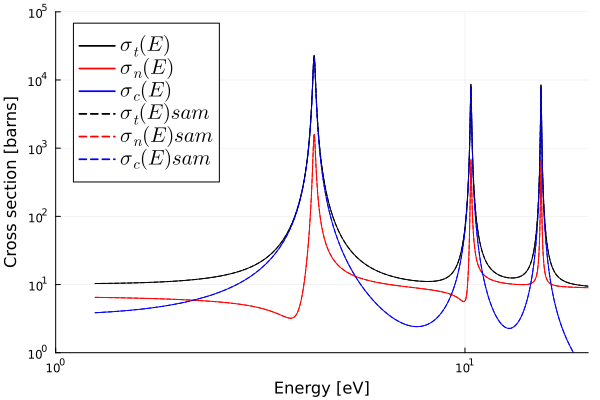

In [13]:
plot(egrid,[sigt,sign,sigc,totlst[:,4],elalst[:,4],caplst[:,4]],
color=["black" "red" "blue" "black" "red" "blue"],
linestyle=[:solid :solid :solid :dash :dash :dash],
label=[L"\sigma_t(E)" L"\sigma_n(E)" L"\sigma_c(E)" L"\sigma_t(E) sam" L"\sigma_n(E) sam" L"\sigma_c(E) sam"],
yaxis=:log,xaxis=:log,xlims=(1e0,2.0e1),ylims=(1e0,1.0e5),legendfont=font(14),legend=:topleft,
xlabel="Energy [eV]",ylabel="Cross section [barns]")


In [11]:
for iE = 1:size(egrid,1)
    fracdifftot = (totlst[iE,4]-sigt[iE])/totlst[iE,4]
    fracdiffcap = (caplst[iE,4]-sigc[iE])/caplst[iE,4]
    fracdiffela = (elalst[iE,4]-sign[iE])/elalst[iE,4]
    err = 0.0001
    if((fracdiffela > err))
        println(egrid[iE]," ",fracdiffela)
    end
end

3.8150091245 0.00012072583988698791
3.8246257138 0.0001461075198577721
3.8342790211 0.00017364249093979018
3.8439686292 0.0002034139859924929
3.8536951641 0.0002354925074592468
3.8634586256 0.0002699270591313096
3.8732592225 0.0003067438104390932
3.8830973719 0.0003459429562581451
3.8929728653 0.00038749237591946913
3.9028861199 0.00043133074902554613
3.9128371357 0.0004773626097477034
3.92282633 0.0005254629846143698
3.9328539113 0.0005754775214359576
3.9429200884 0.0006272281119187378
3.9530246525 0.0006805176995248269
3.9631684382 0.0007351469060467304
3.9733510283 0.0007909124689568809
3.9835730485 0.0008476314879603203
3.9938347076 0.0009051464863885053
4.0041357969 0.0009633384041916386
4.0144769422 0.0010221469989175882
4.0248583523 0.00108157665513646
4.0352798184 0.0011417089170581267
4.0457419666 0.0012027219341489768
4.0562447966 0.0012648947543487286
4.0667885173 0.001328625830803906
4.0773735458 0.0013944491906320257
4.0879998821 0.00146305066141373
4.0986677349 0.00153529

In [12]:
# for energy ( k,rho,penet,etc.)
    # for Jpi (g_J)
        # for resonance
            # for chan
                # for chan
                    # R_chan_chan_Jpi = 